In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data_income=pd.read_csv('income.csv')

In [3]:
data= data_income.copy()

In [4]:
data.size

415714

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


### isnull() gives true if there is a null value

In [6]:
data.isnull()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,False,False,False,False,False,False,False,False,False,False,False,False,False
31974,False,False,False,False,False,False,False,False,False,False,False,False,False
31975,False,False,False,False,False,False,False,False,False,False,False,False,False
31976,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
data.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

## describe gets 8 statistical data

In [8]:
data.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [9]:
data.describe(include='O')

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [10]:
data['JobType'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [11]:
data['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [12]:
np.unique(data['JobType'])

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

In [13]:
np.unique(data['occupation'])

array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'], dtype=object)

In [14]:
data=pd.read_csv('income.csv', na_values=[' ?'])

In [15]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

#### Subset the rows with atleast one column is missing in a row. It considers at least one missing column in a particular row

In [16]:
missing = data[data.isnull().any(axis=1)]

### Delete the rows having missing values

In [17]:
data2 = data.dropna(axis=0) # created a new dataframe data2

In [18]:
data2.size

392106

### Relationship between independent variables

In [19]:
correlation = data2.corr() #gives correlation values between -1 to 1. 
#if it is closer to 1 it means they are closely related.

In [20]:
correlation

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


### <font color="green">None of the variables seems to be correlated</font>

### Checking Correlation between categorical variables

In [21]:
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [22]:
data2['SalStat']

0         less than or equal to 50,000
1         less than or equal to 50,000
2                  greater than 50,000
3         less than or equal to 50,000
4         less than or equal to 50,000
                     ...              
31973     less than or equal to 50,000
31974     less than or equal to 50,000
31975     less than or equal to 50,000
31976     less than or equal to 50,000
31977     less than or equal to 50,000
Name: SalStat, Length: 30162, dtype: object

In [23]:
gender=pd.crosstab(index=data2["gender"],columns="count",normalize=True)

In [24]:
gender

col_0,count
gender,
Female,0.324315
Male,0.675685


### get relation between gender and salary status. gender in rows and salary in columns. Normalize=index gives row proportions equals 1.

In [25]:
gender_selstat=pd.crosstab(index=data2["gender"],columns=data2["SalStat"],margins=True,normalize="index")

In [26]:
gender_selstat

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.113678,0.886322
Male,0.313837,0.686163
All,0.248922,0.751078


### <font color="red">Dont just give sns.countplot(data2['SalStat']) it will give Future warning. Give "x=" in the syntax like this sns.countplot(x=data2['SalStat']).</font>

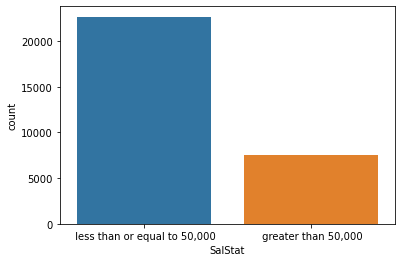

In [27]:
SalStat = sns.countplot(x=data2['SalStat'])

## Histogram of Age. 

### <font color="red">Remember distplot is deprecated, so use displot.</font>

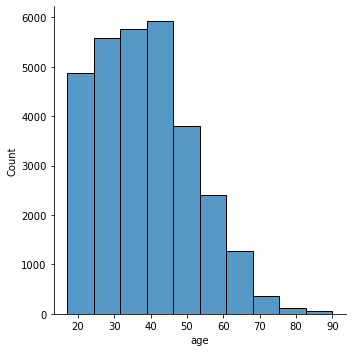

In [28]:
sns.displot(data2['age'], bins=10,kde=False)

### Boxplot of Age vs salary status

### <font color="red">To avoid Futurer Warning use (x='SalStat',y='age',data=data2) instead of just this ('SalStat','age',data=data2)</font>

SalStat
 greater than 50,000             43
 less than or equal to 50,000    34
Name: age, dtype: int64

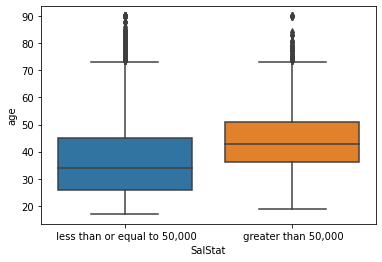

In [29]:
#To know how age is affecting the salary status
sns.boxplot(x='SalStat',y='age',data=data2)
data2.groupby('SalStat')['age'].median()

### Reindexing the salary status names to 0,1

In [30]:
data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
data2['SalStat'].value_counts

<ipython-input-30-9c787b52a553>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})


<bound method IndexOpsMixin.value_counts of 0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64>

In [31]:
data2

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,0
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,0
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,0
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,0
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,0
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,0


### Converting string values to boolean values so that we can work with machine learning

In [32]:
new_data = pd.get_dummies(data2,drop_first=True)

## All unique categories converted to columns. If any row has 0 in it, it means it is a different cat and 1 means it belongs to that cat.

In [33]:
new_data

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,27,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,0,0,35,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31974,34,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31975,23,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31976,42,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Storing the column names

In [34]:
columns_list = list(new_data.columns)
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-s

### Separating the input names from the data

In [35]:
features = list(set(columns_list)-set(['SalStat']))
print(features)

['nativecountry_ Poland', 'nativecountry_ Italy', 'nativecountry_ Philippines', 'nativecountry_ Outlying-US(Guam-USVI-etc)', 'nativecountry_ Greece', 'nativecountry_ Canada', 'EdType_ Bachelors', 'nativecountry_ Hong', 'nativecountry_ United-States', 'nativecountry_ Holand-Netherlands', 'nativecountry_ Mexico', 'relationship_ Not-in-family', 'nativecountry_ Hungary', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'nativecountry_ Japan', 'occupation_ Tech-support', 'JobType_ Private', 'relationship_ Wife', 'nativecountry_ Dominican-Republic', 'nativecountry_ Trinadad&Tobago', 'EdType_ Assoc-voc', 'race_ Other', 'nativecountry_ Jamaica', 'nativecountry_ Ireland', 'EdType_ 11th', 'EdType_ 5th-6th', 'occupation_ Handlers-cleaners', 'nativecountry_ Germany', 'relationship_ Unmarried', 'nativecountry_ South', 'EdType_ 9th', 'EdType_ Prof-school', 'JobType_ Self-emp-inc', 'nativecountry_ Laos', 'EdType_ Masters', 'nativecountry_ Vietnam', 'race_ White', 'occupation_ Other-service'

### Storing the output values in y. .values extract values from that column

In [36]:
new_data

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,27,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,0,0,35,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31974,34,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31975,23,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31976,42,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [37]:
y1 = new_data['SalStat'].values
print(y1)

[0 0 1 ... 0 0 0]


###  Storing the values from input features

In [38]:
x1 = new_data[features].values
print(x1)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Splitting the data into train and test

In [39]:
train_x, test_x, train_y,test_y = train_test_split(x1,y1,test_size=0.3,random_state=0)

### Make an instance of the model

### <font color='red'>As it did not converge I used iter=10000.</font>
Error was ConvergenceWarning: lbfgs failed to converge (status=1):STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

In [40]:
logistic1 = LogisticRegression(max_iter=10000)

In [41]:
logistic1.fit(train_x,train_y)
logistic1.coef_
logistic1.intercept_

array([-3.61510611])

In [42]:
prediction1 = logistic1.predict(test_x)
print(prediction1)

[0 0 0 ... 0 0 0]


### Confusion_matrix

In [43]:
confusion_matrix1 = confusion_matrix(test_y, prediction)
print(confusion_matrix1)

NameError: name 'prediction' is not defined

### Calculating the Accuracy

In [ ]:
accuracy_score1  = accuracy_score(test_y,prediction)
print(accuracy_score1)

### Printing the misclassified value from Prediction

In [ ]:
print('Misclassified samples: %d' % (test_y != prediction).sum())

### Logistic Regression - Removing Insignificant variables

##### Reindexing the salary status name to 0,1

In [ ]:
#data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})

In [ ]:
print(data2['SalStat'])

In [ ]:
cols = ['gender','nativecountry','race','JobType']

In [ ]:
new_data = data2.drop(cols,axis = 1)

In [ ]:
new_data = pd.get_dummies(new_data,drop_first=True)

### Storing the column names

In [ ]:
columns_list = list(new_data.columns)

In [ ]:
print(columns_list)

### separating the input names from data

In [ ]:
features = list(set(columns_list) - set(['SalStat']))

In [ ]:
print(features)

### Storing the output values in y

In [ ]:
y = new_data['SalStat'].values
print(y)

### Storing thevalues from input features

In [ ]:
x = new_data[features].values
print(x)

In [ ]:
train_x, test_x, train_y,test_y = train_test_split(x,y,test_size=0.3,random_state=0)
logistic = LogisticRegression(max_iter=10000)
logistic.fit(train_x,train_y)

### Prediction from test data

In [ ]:
prediction1 = logistic.predict(test_x)
print(prediction1)

### calculating the accuracy

In [ ]:
accuracy_scores  = accuracy_score(test_y,prediction1)
print(accuracy_scores)

### printing the misclassified values from prediction

In [ ]:
print('Misclassified samples: %d' % (test_y != prediction).sum())

# KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

### import library for plotting

In [ ]:
import matplotlib.pyplot as plt

### Storing the K nearest neighbors classifier

In [ ]:
KNN_Classifier = KNeighborsClassifier(n_neighbors=5)

### fitting the values for x and y

In [ ]:
KNN_Classifier.fit(train_x, train_y)

In [ ]:
#predicting the text values with model
prediction = KNN_Classifier.predict(test_x)

In [ ]:
#Performance metric check

In [ ]:
confusion_matrix = confusion_matrix(test_y,prediction)
print("\t","Predicted Values")
print("Original values","\n",confusion_matrix)

### calculating the accuracy

In [ ]:
accuracy_score = accuracy_score(test_y, prediction)
print(accuracy_score)

In [ ]:
print('Misclassified samples: %d' %(test_y != prediction).sum())

In [ ]:
Misclassified_sample = []
#Claculating error for k values between 1 ans 20
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x, train_y)
    pred_i = knn.predict(test_x)
    Misclassified_sample.append((test_y != pred_i).sum())
    
print(Misclassified_sample)